In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from os import listdir
import json
import math
from ripser import ripser, lower_star_img
from persim import plot_diagrams
from scipy import stats
from scipy.stats import gaussian_kde

from scipy.spatial import ConvexHull, convex_hull_plot_2d

from shapely.geometry import Polygon
from shapely.geometry import MultiPolygon

from scipy.signal import argrelextrema,argrelmax

from itertools import chain

from scipy import optimize

from sklearn.linear_model import LinearRegression

In [2]:
from scipy.spatial import Delaunay
import numpy as np

# https://stackoverflow.com/questions/50549128/boundary-enclosing-a-given-set-of-points

#  matlab boundary - https://stackoverflow.com/questions/31836709/what-algorithm-does-matlabs-boundary-function-use

# https://www.mathworks.com/help/matlab/ref/boundary.html

#  javascript implementation of hull - https://github.com/AndriiHeonia/hull

# alpha shape https://en.wikipedia.org/wiki/Alpha_shape
# https://doc.cgal.org/latest/Alpha_shapes_2/index.html

def alpha_shape(points, alpha, only_outer=False):
    """
    Compute the alpha shape (concave hull) of a set of points.
    :param points: np.array of shape (n,2) points.
    :param alpha: alpha value.
    :param only_outer: boolean value to specify if we keep only the outer border
    or also inner edges.
    :return: set of (i,j) pairs representing edges of the alpha-shape. (i,j) are
    the indices in the points array.
    """
    assert points.shape[0] > 3, "Need at least four points"

    def add_edge(edges, i, j):
        """
        Add an edge between the i-th and j-th points,
        if not in the list already
        """
        if (i, j) in edges or (j, i) in edges:
            # already added
            assert (j, i) in edges, "Can't go twice over same directed edge right?"
            if only_outer:
                # if both neighboring triangles are in shape, it's not a boundary edge
                edges.remove((j, i))
            return
        edges.add((i, j))

    tri = Delaunay(points)
    edges = set()
    # Loop over triangles:
    # ia, ib, ic = indices of corner points of the triangle
    for ia, ib, ic in tri.vertices:
        pa = points[ia]
        pb = points[ib]
        pc = points[ic]
        # Computing radius of triangle circumcircle
        # www.mathalino.com/reviewer/derivation-of-formulas/derivation-of-formula-for-radius-of-circumcircle
        a = np.sqrt((pa[0] - pb[0]) ** 2 + (pa[1] - pb[1]) ** 2)
        b = np.sqrt((pb[0] - pc[0]) ** 2 + (pb[1] - pc[1]) ** 2)
        c = np.sqrt((pc[0] - pa[0]) ** 2 + (pc[1] - pa[1]) ** 2)
        s = (a + b + c) / 2.0
        area = np.sqrt(s * (s - a) * (s - b) * (s - c))
        circum_r = a * b * c / (4.0 * area)
        if circum_r < alpha:
            add_edge(edges, ia, ib)
            add_edge(edges, ib, ic)
            add_edge(edges, ic, ia)
    return edges

In [3]:
def find_edges_with(i, edge_set):
    i_first = [j for (x,j) in edge_set if x==i]
    i_second = [j for (j,x) in edge_set if x==i]
    return i_first,i_second

def stitch_boundaries(edges):
    edge_set = edges.copy()
    boundary_lst = []
    while len(edge_set) > 0:
        boundary = []
        edge0 = edge_set.pop()
        boundary.append(edge0)
        last_edge = edge0
        while len(edge_set) > 0:
            i,j = last_edge
            j_first, j_second = find_edges_with(j, edge_set)
            if j_first:
                edge_set.remove((j, j_first[0]))
                edge_with_j = (j, j_first[0])
                boundary.append(edge_with_j)
                last_edge = edge_with_j
            elif j_second:
                edge_set.remove((j_second[0], j))
                edge_with_j = (j, j_second[0])  # flip edge rep
                boundary.append(edge_with_j)
                last_edge = edge_with_j

            if edge0[0] == last_edge[1]:
                break

        boundary_lst.append(boundary)
    return boundary_lst

211.csv


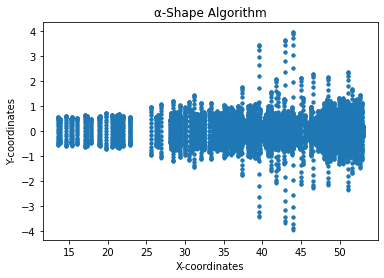

In [2]:
fileName = []
area = []
length = []
height = []
width = []
slope = []

alphaValue = 0.35
ordBounLen = 5
maximaDistance = 0.4

# onlyfiles = [f for f in listdir("data/input/{}".format(folder)) ]
folder = 'newData'
file = '211.csv'
# for file in onlyfiles:
df = pd.read_csv('data/input/{}/{}'.format(folder,file))
print(file)
x = df['Points:0'].to_numpy()
y = df['Points:1'].to_numpy()

inside = ((x ** 2 + y ** 2 > 1.0) & ((x - 3) ** 2 + y ** 2 > 1.0))

points = np.vstack([x[inside], y[inside]]).T

# Computing the alpha shape
# edges = alpha_shape(points, alpha=alphaValue, only_outer=True)

# Plotting the output
plt.figure()
plt.title('α-Shape Algorithm')
plt.xlabel('X-coordinates')
plt.ylabel('Y-coordinates')
plt.plot(points[:, 0], points[:, 1], '.')
#         plt.ylim([-1, 1])
# for i, j in edges:
# #     print(i, j, points[[i, j], 0], points[[i, j], 1])

#     plt.plot(points[[i, j], 0], points[[i, j], 1])

# Save figure
#         plt.savefig('scatter_line.jpg', dpi=300, transparent=False, bbox_inches='tight')

plt.show()

6061 6061


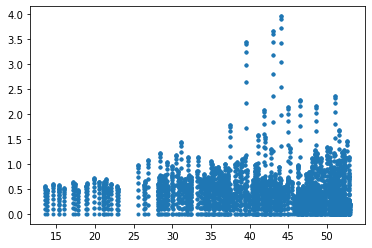

In [3]:
positive = df.loc[df['Points:1'] >= 0]
xPositive = positive['Points:0'].to_numpy()
yPositive = positive['Points:1'].to_numpy()
yMean = np.mean(yPositive)
print(len(xPositive), len(yPositive))

plt.plot(xPositive, yPositive, '.')

In [4]:
positive.head()

,origId,iceLabel,d,T,Points:0,Points:1,Points:2,cluster,nodeCluster
0,3431,1,5.187300e-08,237.74,13.87,0.479120,7.812400e-12,6,12
1,3431,1,5.187300e-08,237.74,13.87,0.471841,8.319831e-02,6,12
2,3431,1,5.187300e-08,237.74,13.87,0.450226,1.638687e-01,6,12
3,3431,1,5.187300e-08,237.74,13.87,0.414930,2.395600e-01,6,12
4,3431,1,5.187300e-08,237.74,13.87,0.367027,3.079724e-01,6,12


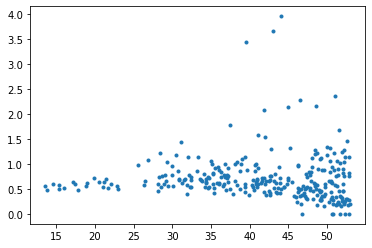

In [51]:
outline = positive.groupby('Points:0')['Points:1'].max().reset_index()
outline.columns = ['x', 'y']

# print(outline.head())
# print(outline['x'].value_counts())

xOutline = outline['x'].to_numpy()
yOutline = outline['y'].to_numpy()
# yMean = np.mean(yPositive)
# print(len(xPositive), len(yPositive))

plt.plot(xOutline, yOutline, '.')

In [52]:
# assemble matrix A
A = np.vstack([xOutline, np.ones(len(xOutline))]).T

# turn y into a column vector
yOutlineColumn = yOutline[:, np.newaxis]
# print(yOutline)

In [53]:
# Direct least square regression
alpha = np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)),yOutlineColumn)
print(alpha)

[[-0.00185835]
 [ 0.78926695]]


In [63]:
outlineDict = {}

for i in range(len(xOutline)):
    outlineDict[xOutline[i]] = alpha[0]*xOutline[i] + alpha[1]

# print(outlineDict)

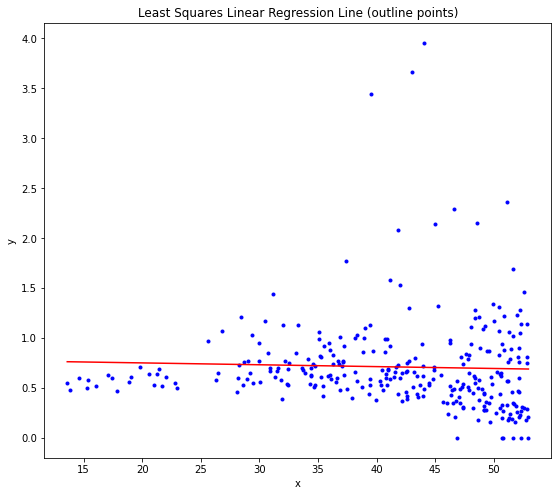

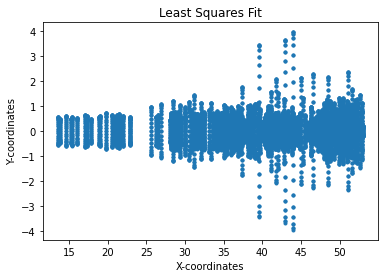

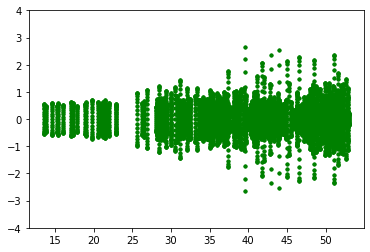

In [67]:
# plot the results
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
plt.title('Least Squares Linear Regression Line (outline points)')
plt.plot(xOutline, yOutlineColumn, 'b.')
plt.plot(xOutline, alpha[0]*xOutline + alpha[1], 'r')
plt.xlabel('x')
plt.ylabel('y')
# plt.show()

plt.figure()
# plt.subplot(1,2,1)
plt.title('Least Squares Fit')
plt.xlabel('X-coordinates')
plt.ylabel('Y-coordinates')
plt.plot(points[:, 0], points[:, 1], '.')
plt.show()

# # plt.figure(figsize = (10,8))
# plt.subplot(1,2,2)
# plt.title('Least Squares Linear Regression Line (positive points)')
# plt.plot(xPositive, yPositive, 'b.')
# plt.plot(xOutline, alpha[0]*xOutline + alpha[1], 'r')
# plt.xlabel('x')
# plt.ylabel('y')
# plt.show()

stdY = np.std(yPositive)
epsilon = 5


pX = []
pY = []

nX = []
nY = []

plt.figure()
# plt.subplot(1,2,2)
# plt.plot(x,y, '.')
# print(len(xOutline), len(yOutline), len(xPositive), len(yPositive))
for i in range(0, len(yPositive)):
#     print(yPositive[i], outlineDict[xPositive[i]], epsilon * stdY)
    if (yPositive[i] - outlineDict[xPositive[i]]) <= (epsilon * stdY) : 
        pX.append(xPositive[i])
        pY.append(yPositive[i])
        
        nX.append(xPositive[i])
        nY.append(-yPositive[i])
        
# plt.figure()
plt.ylim([-4,4])
plt.plot(nX, nY, 'g.')
plt.plot(pX, pY, 'g.')

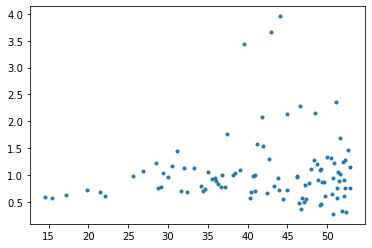

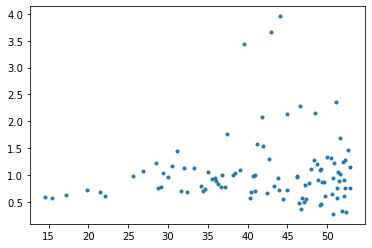

In [11]:
lmIndex = argrelmax(yOutline)[0]
# print(lmIndex)
lyp = yOutline[lmIndex]
# print(lyp)
lxp = xOutline[lmIndex]

plt.figure()
plt.plot(lxp, lyp, '.')

exmax = argrelextrema(yOutline, np.greater)[0]
eyp = yOutline[exmax]
exp = xOutline[exmax] 

plt.figure()
plt.plot(exp, eyp, '.')

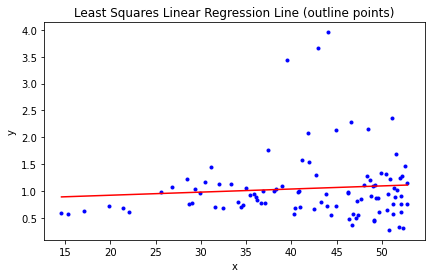

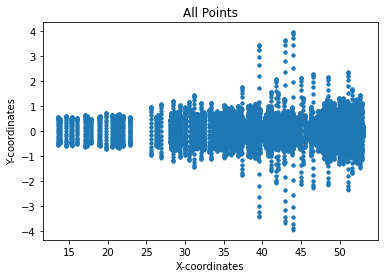

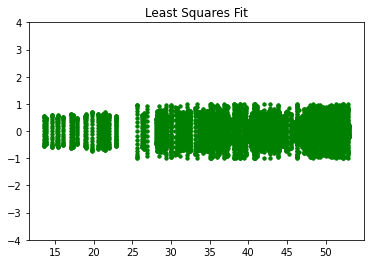

In [12]:
# assemble matrix A
A = np.vstack([lxp, np.ones(len(lxp))]).T

# turn y into a column vector
lypColumn = lyp[:, np.newaxis]


# Direct least square regression
alpha = np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)),lypColumn)
# print(alpha)



# plot the results
plt.figure(figsize = (15,4))
plt.subplot(1,2,1)
plt.title('Least Squares Linear Regression Line (outline points)')
plt.plot(lxp, lypColumn, 'b.')
plt.plot(lxp, alpha[0]*lxp + alpha[1], 'r')
plt.xlabel('x')
plt.ylabel('y')
# plt.show()

plt.figure()
# plt.subplot(1,2,1)
plt.title('All Points')
plt.xlabel('X-coordinates')
plt.ylabel('Y-coordinates')
plt.plot(points[:, 0], points[:, 1], '.')
plt.show()

# # plt.figure(figsize = (10,8))
# plt.subplot(1,2,2)
# plt.title('Least Squares Linear Regression Line (positive points)')
# plt.plot(xPositive, yPositive, 'b.')
# plt.plot(xOutline, alpha[0]*xOutline + alpha[1], 'r')
# plt.xlabel('x')
# plt.ylabel('y')
# plt.show()


pX = []
pY = []

nX = []
nY = []


# plt.subplot(1,2,2)
# plt.plot(x,y, '.')
for i in range(0, len(yPositive)):
    if yPositive[i] <=  all(alpha[0]*lxp + alpha[1]) : 
        pX.append(xPositive[i])
        pY.append(yPositive[i])
        
        nX.append(xPositive[i])
        nY.append(-yPositive[i])
        
plt.figure()
plt.title('Least Squares Fit')
plt.ylim([-4,4])
plt.plot(nX, nY, 'g.')
plt.plot(pX, pY, 'g.')

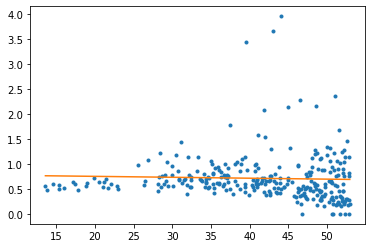

In [29]:
from scipy import stats
# print(lyp)
slope, intercept, r, p, std_err = stats.linregress(xOutline, yOutline)

def myfunc(x):
    return slope * x + intercept

mymodel = list(map(myfunc, xOutline))

plt.figure()
plt.plot(xOutline, yOutline, '.')
plt.plot(xOutline, mymodel)
plt.show()

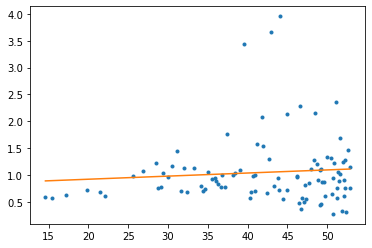

In [30]:
from scipy import stats
# print(lyp)
slopeMaxima, interceptMaxima, rMaxima, pMaxima, std_errMaxima = stats.linregress(lxp, lyp)

def myfunc(x):
    return slopeMaxima * x + interceptMaxima

mymodelMaxima = list(map(myfunc, lxp))

plt.figure()
plt.plot(lxp, lyp, '.')
plt.plot(lxp, mymodelMaxima)
plt.show()

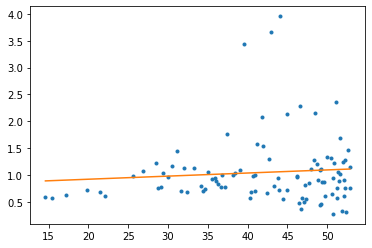

In [34]:
plt.figure()
plt.plot(lxp, lyp, '.')

m,b = np.polyfit(lxp, lyp, 1)

plt.plot(lxp, m*lxp+b)
plt.show()

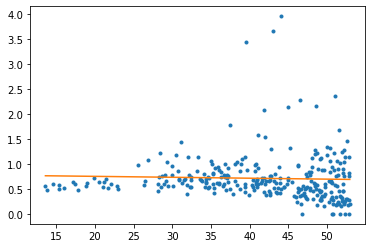

In [36]:
plt.figure()
plt.plot(xOutline, yOutline, '.')

mOutline,bOutline = np.polyfit(xOutline, yOutline, 1)

plt.plot(xOutline, mOutline*xOutline+bOutline)
plt.show()

In [40]:
stdY = np.std(yPositive)
stdY

0.4157724774615321

In [46]:
if xOutline[0] in xPositive:
    print("yes")

yes
